# txt (print 在 console 會是正的的)


In [9]:
import os
if not os.path.exists('./output/txt_out'):
    os.makedirs('./output/txt_out')

In [10]:
import os
import pandas as pd


def len_with_chinese(s):
    l = 0
    for c in s:
        l += 2 if ord(c) > 127 else 1
    return l


def series_max_len(series, withColumn=True):
    max_value = None
    max_len = 0
    for value in series.values:
        if max_value is None or len_with_chinese(value) > max_len:
            max_value = value
            max_len = len_with_chinese(value)
    if withColumn:
        if len_with_chinese(series.name) > max_len:
            max_value = series.name

    return max_value


def make_txt_tabl(df):
    each_column_max_len = []
    for column in df.columns:
        max_len_item = series_max_len(df[column])
        each_column_max_len.append(len_with_chinese(max_len_item))

    # border
    border = ""
    for v in each_column_max_len:
        border += "+"
        border += "-"*(v+2)
    border += "+\n"

    # column
    data = border
    for index, column in enumerate(df.columns):
        column_len = len_with_chinese(column)
        space_left = (each_column_max_len[index]+2-column_len)//2
        space_right = each_column_max_len[index]+2-column_len-space_left
        data += ("|"+space_left*" "+column+space_right*" ")
    data += "|\n"

    # data
    h, w = df.shape
    for y in range(h):
        data += border
        for x in range(w):
            element = df.iloc[y, x]
            element_len = len_with_chinese(element)
            space_left = (each_column_max_len[x]+2-element_len)//2
            space_right = each_column_max_len[x]+2-element_len-space_left
            data += ("|"+space_left*" "+element+space_right*" ")
        data += "|\n"
    data += border

    return data


# main
files = ["106_simplified.csv", "107_simplified.csv",
         "108_simplified.csv", "109_simplified.csv", "110_simplified.csv"]

for file in files:
    path = os.path.join("data", file)
    df = pd.read_csv(path)
    df["延修率"] = df["延修率"].round(4).astype(str)
    df["休學率"] = df["休學率"].round(4).astype(str)
    df["退學率"] = df["退學率"].round(4).astype(str)
    df["排名"] = df["排名"].astype(str)

    print(file.center(40, "="))
    table = make_txt_tabl(df)
    print(table)

    # write to txt
    with open(f"./output/txt_out/{file}.txt", "w+", encoding="utf8") as f:
        f.write(table)

===========106_simplified.csv===========
+------------------+---------+--------+--------+--------+
|     學校名稱     |  排名   | 延修率 | 休學率 | 退學率 |
+------------------+---------+--------+--------+--------+
|     中原大學     | 601-800 | 0.0408 | 0.0812 | 0.0483 |
+------------------+---------+--------+--------+--------+
|   中國醫藥大學   | 501-600 | 0.0149 | 0.0674 | 0.0441 |
+------------------+---------+--------+--------+--------+
|     亞洲大學     | 601-800 | 0.0326 | 0.0546 | 0.0908 |
+------------------+---------+--------+--------+--------+
|     元智大學     | 601-800 | 0.0358 | 0.044  | 0.0502 |
+------------------+---------+--------+--------+--------+
|   國立中央大學   | 601-800 | 0.0194 | 0.0787 | 0.0454 |
+------------------+---------+--------+--------+--------+
|   國立中山大學   | 601-800 | 0.0261 | 0.1018 | 0.0563 |
+------------------+---------+--------+--------+--------+
|   國立中正大學   | 601-800 | 0.0229 | 0.0929 | 0.049  |
+------------------+---------+--------+--------+--------+
|   國立中興大學   | 601-800 |

# html


In [11]:
import os
if not os.path.exists('./output/html_out'):
    os.makedirs('./output/html_out')

In [12]:
import pandas as pd
import os


def make_html(df):
    # add table
    dom = ""
    dom += "<table border=1>"

    # add column title
    dom += "<tr>"
    for column in df.columns:
        dom += f"<th>{column}</th>"
    dom += "</tr>"

    # add data

    h, w = df.shape

    for y in range(h):
        dom += "<tr>"
        for x in range(w):
            dom += f"<td>{df.iloc[y,x]}</td>"
        dom += "<tr>"

    # end table
    dom += "</table>"

    return dom


# main
files = ["106_simplified.csv", "107_simplified.csv",
         "108_simplified.csv", "109_simplified.csv", "110_simplified.csv"]

for file in files:
    path = os.path.join("data", file)
    df = pd.read_csv(path)
    df["延修率"] = df["延修率"].round(4).astype(str)
    df["休學率"] = df["休學率"].round(4).astype(str)
    df["退學率"] = df["退學率"].round(4).astype(str)
    df["排名"] = df["排名"].astype(str)

    dom = make_html(df)

    # write to html
    with open(f"./output/html_out/{file}.html", "w+", encoding="utf8") as f:
        f.write(dom)

# matplotlib


# 有排名和沒排名學校延修率,休學率,退學率比較


In [13]:
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=["年分", "有排名學校延修率", "有排名學校休學率",
                  "有排名學校退學率", "無排名學校延修率", "無排名學校休學率", "無排名學校退學率"])

for year in range(106, 111):

    #  taiwan schools that year
    taiwan_school = pd.read_csv(f"./data/{year}.csv")

    d = {column: 0 for column in df.columns}
    d["年份"] = year
    ranking_count = 0
    no_ranking_count = 0

    h, w = taiwan_school.shape

    for y in range(h):
        total_student = taiwan_school.iloc[y, 1]
        if total_student <= 0:
            continue
        school_name = taiwan_school.iloc[y, 0]
        delay_total_student = taiwan_school.iloc[y, 4]
        suspension_total_student = taiwan_school.iloc[y, 13]
        quit_total_student = taiwan_school.iloc[y, 29]
        if pd.isna(taiwan_school.iloc[y,43]):
            no_ranking_count += 1
            d["無排名學校延修率"] += (delay_total_student/total_student)
            d["無排名學校休學率"] += (suspension_total_student/total_student)
            d["無排名學校退學率"] += (quit_total_student/total_student)
        else:
            ranking_count += 1
            d["有排名學校延修率"] += (delay_total_student/total_student)
            d["有排名學校休學率"] += (suspension_total_student/total_student)
            d["有排名學校退學率"] += (quit_total_student/total_student)

    d["有排名學校延修率"] /= ranking_count
    d["有排名學校休學率"] /= ranking_count
    d["有排名學校退學率"] /= ranking_count
    d["無排名學校延修率"] /= no_ranking_count
    d["無排名學校休學率"] /= no_ranking_count
    d["無排名學校退學率"] /= no_ranking_count

    df.loc[len(df)] = d
print(df)

   年分  有排名學校延修率  有排名學校休學率  有排名學校退學率  無排名學校延修率  無排名學校休學率  無排名學校退學率
0   0  0.025807  0.083108  0.050180  0.031506  0.081012  0.085520
1   0  0.027108  0.083915  0.052362  0.031421  0.078944  0.083910
2   0  0.027469  0.085075  0.052305  0.032868  0.082757  0.093325
3   0  0.028239  0.076815  0.049808  0.033935  0.080944  0.091229
4   0  0.028266  0.074647  0.052175  0.033714  0.081844  0.095740


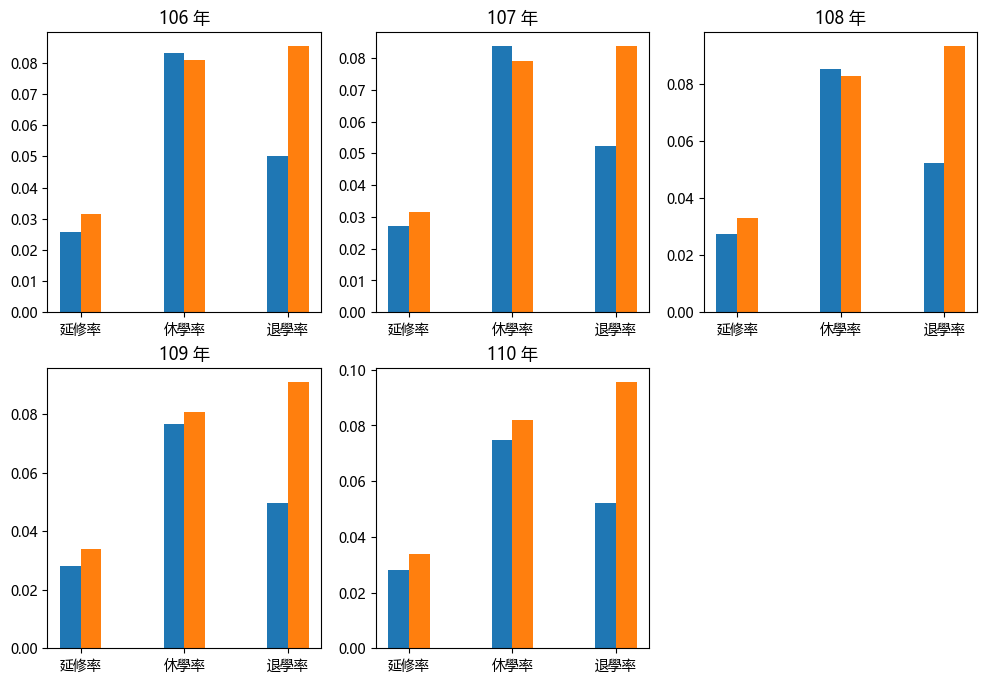

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Microsoft YaHei')


fig = plt.figure(figsize=(12, 8))

for i in range(5):
    year = 106+i

    x = np.arange(3)
    width = 0.2

# 建立子圖
    ax = fig.add_subplot(23*10+(i+1))
    ax.set_title(f"{year} 年")
    ax.bar(x-0.1, height=[df.iloc[i, 1],
                          df.iloc[i, 2], df.iloc[i, 3]], width=width)
    ax.bar(x+0.1, height=[df.iloc[i, 4],
                          df.iloc[i, 5], df.iloc[i, 6]], width=width)
    ax.set_xticks(x, ["延修率", "休學率", "退學率"])

# plotly.express

# 退學原因分布

In [15]:
import pandas as pd
import numpy as np

# ranking
df1 = None
# no ranking
df2 = None

for year in range(106, 111):

    #  taiwan schools that year
    taiwan_school = pd.read_csv(f"./data/{year}.csv")

    if df1 is None:
        df1 = pd.DataFrame(columns=["年份"]+list(taiwan_school.columns[29:-2]))
        df2 = pd.DataFrame(columns=["年份"]+list(taiwan_school.columns[29:-2]))

    d1 = {"年份": year}
    d2 = {"年份": year}

    for column in taiwan_school.columns[29:-2]:
        d1[column] = 0
        d2[column] = 0

    h, w = taiwan_school.shape

    for y in range(h):
        dict_select = d2 if pd.isna(taiwan_school.iloc[y, 43]) else d1

        for index, column in enumerate(taiwan_school.columns[29:-2]):
            dict_select[column] += taiwan_school.iloc[y, 29+index]

    df1.loc[len(df1)] = d1
    df2.loc[len(df2)] = d2
    
# print(df)
print(df1)
print(df2)

    年份  退學人數-總計  退學人數-因成績不佳或曠課時數過多  退學人數-因操行成績  退學人數-因志趣不合  退學人數-因逾期未註冊  \
0  106    16750               2627           2        3314         3906   
1  107    17754               2404           2        3353         3760   
2  108    17988               2227           6        4066         3838   
3  109    17604               2112           3        4031         3798   
4  110    18141               1841          11        4265         4300   

   退學人數-因休學逾期未復學  退學人數-因懷孕  退學人數-因育嬰  退學人數-因傷病  退學人數-因工作需求  退學人數-因經濟困難  \
0           5180         2         5        49         474          76   
1           6152         0         3        75         576          95   
2           5898         1        10        81         620         115   
3           5733         3        12       122         606          89   
4           5617         1         7       127         675         107   

   退學人數-因生涯規劃  退學人數-其他(不含死亡)  
0         418            697  
1         635            699  
2         6

In [16]:
# import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px


for i in range(5):
    year = 106+i

    label1 = df1.iloc[i, 2:].T.index
    fig1 = px.pie(df1.iloc[i, 2:].T, values=i, names=label1)
    label2 = df2.iloc[i, 2:].T.index
    fig2 = px.pie(df2.iloc[i, 2:].T, values=i, names=label2)

    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]])

    fig.add_trace(fig1['data'][0], row=1, col=1)

    fig.add_trace(fig2['data'][0], row=1, col=2)

    fig.update_layout(title_text=f'{year} 年-退學人數分布')

    fig.show()